# 3. Feature selection

In [35]:
import pandas as pd

In [36]:
# loading the dataset
df_scaled = pd.read_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv")
df_scaled

,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,DESWLsyd,...,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_SET_INCIDENCE_C4_COMMON_WORDS,Polarity,Overall_Sentiment,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Subjectivity
0,0.444444,0.000000,0.146154,0.027027,0.000000,0.151143,0.682139,0.000000,1.000000,0.563762,...,0.396186,0.393986,0.674648,0.685198,Fake,0.7783,0.033,0.109,0.858,0.332143
1,0.222222,0.176471,0.253846,0.148649,0.176471,0.201948,0.249849,0.248429,0.109532,0.116088,...,0.309322,0.612986,0.682585,0.252618,Fake,0.7763,0.045,0.106,0.849,0.513112
2,0.222222,0.235294,0.276923,0.189189,0.235294,0.220999,0.191726,0.215594,0.199330,0.134906,...,0.297608,0.685996,0.654967,0.546360,Fake,-0.2944,0.150,0.123,0.726,0.397129
3,0.222222,0.176471,0.307692,0.148649,0.176471,0.240051,0.300706,0.189370,0.191279,0.119235,...,0.147246,0.814876,0.426085,0.367094,Fake,0.6486,0.000,0.032,0.968,0.497222
4,0.222222,0.294118,0.296154,0.229730,0.294118,0.220999,0.147614,0.110956,0.139367,0.084885,...,0.617585,0.218604,0.515320,0.550734,Fake,0.9531,0.000,0.145,0.855,0.454167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.222222,0.176471,0.296154,0.148649,0.176471,0.227350,0.289808,0.164698,0.264674,0.203276,...,0.306847,0.621988,0.530017,0.516772,True,0.6705,0.017,0.069,0.914,0.428052
446,0.888889,0.117647,0.273077,0.010811,0.037203,0.053345,0.386983,0.384460,0.050249,0.047174,...,0.323093,0.499129,0.691053,0.339440,True,0.9590,0.024,0.180,0.796,0.395543
447,0.444444,0.000000,0.130769,0.000000,0.048029,0.075642,0.645812,0.000000,0.370429,0.251662,...,0.606992,0.835890,0.640981,0.230619,True,0.7964,0.000,0.090,0.910,0.620455
448,0.222222,0.470588,0.534615,0.351351,0.352941,0.337426,0.153582,0.189306,0.225581,0.206593,...,0.423729,0.532790,0.651265,0.156495,True,0.9532,0.089,0.175,0.736,0.473939


Before making some base models to check if there's a certain algorithm that performs best for our task, I will go into a couple of techniques to try to reduce the number of features used.

In [37]:
all_features = list(df_scaled.columns)
all_features

['DESPC',
 'DESSC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLsy',
 'DESWLsyd',
 'DESWLlt',
 'DESWLltd',
 'LDTTRc',
 'LDTTRa',
 'LDMTLD',
 'LDHDD',
 'SYNLE',
 'SYNNP',
 'SYNMEDpos',
 'SYNMEDwrd',
 'SYNMEDlem',
 'SYNSTRUTa',
 'RDFRE',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
 'TOKEN_ATTRIBUTE_RATIO_PUNCT',
 'TOKEN_ATTRIBUTE_RATIO_URL',
 'WORD_SET_INCIDENCE_WRDPRP1s',
 'WORD_SET_INCIDENCE_WRDPRP1p',
 'WORD_SET_INCIDENCE_WRDPRP2',
 'WORD_SET_INCIDENCE_WRDPRP3s',
 'WORD_SET_INCIDENCE_WRDPRP3p',
 'WORD_SET_INCIDENCE_CNCCaus',
 'WORD_SET_INCIDENCE_CNCLogic',
 'WORD_SET_INCIDENCE_CNCTemp',
 'WORD_SET_INCIDENCE_CNCAdd',
 'WORD_SET_INCIDENCE_CNCPos',
 'WORD_SET_INCIDENCE_CNCNeg',
 'WORD_PROPERTY_WRDNOUN',
 'WORD_PROPERTY_WRDVERB',
 'WORD_PROPERTY_WRDADJ',
 'WORD_PROPERTY_WRDADV',
 'WORD_PROPERTY_WRDFRQc',
 'WORD_PROPERTY_WRDFRQa',
 'WORD_PROPERTY_WRDFRQmc',
 'WORD_PROPERTY_WRDFAMc',
 'WORD_PROPERTY_WRDCNCc',
 'WORD_PROPERTY_WRDIMGc

## Correlation

First, we'll have a look at the correlation of the features with the Polarity outcome.
To check the correlation of our binary outcome (true or false) and our continuous values we can compute the point biserial correlation coefficient.


In [38]:
df_scaled["Polarity"] = df_scaled["Polarity"].replace(["True", "Fake"], [1, 0])

C:\Users\alber\AppData\Local\Temp\ipykernel_5468\378948612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled["Polarity"] = df_scaled["Polarity"].replace(["True", "Fake"], [1, 0])


In [39]:
from scipy.stats import pointbiserialr

correlation = []

corr_threshold = 0.2

for feature in all_features:
    if feature == "Polarity":
        continue
    
    pointbi = pointbiserialr(x=df_scaled['Polarity'], y=df_scaled[feature])
    
    pointbi_stat = pointbi.statistic.round(2)
    
    # print(feature)
    
    if pointbi_stat <= -(corr_threshold) or pointbi_stat >= corr_threshold:
        print(feature, pointbi_stat, "Correlation found")
        correlation.append(feature)
        
    else:
        print(feature, pointbi_stat, "No strong correlation found")
        
print(len(correlation))
print(correlation)
    

DESPC 0.31 Correlation found
DESSC -0.04 No strong correlation found
DESWC 0.12 No strong correlation found
DESPL -0.2 Correlation found
DESPLd -0.15 No strong correlation found
DESPLw -0.2 Correlation found
DESSL 0.25 Correlation found
DESSLd 0.2 Correlation found
DESWLsy 0.03 No strong correlation found
DESWLsyd 0.06 No strong correlation found
DESWLlt -0.02 No strong correlation found
DESWLltd 0.14 No strong correlation found
LDTTRc 0.02 No strong correlation found
LDTTRa -0.02 No strong correlation found
LDMTLD 0.08 No strong correlation found
LDHDD 0.11 No strong correlation found
SYNLE 0.13 No strong correlation found
SYNNP 0.18 No strong correlation found
SYNMEDpos 0.12 No strong correlation found
SYNMEDwrd 0.13 No strong correlation found
SYNMEDlem 0.18 No strong correlation found
SYNSTRUTa -0.03 No strong correlation found
RDFRE -0.16 No strong correlation found
READFKGL 0.22 Correlation found
TOKEN_ATTRIBUTE_RATIO_ALHPA -0.32 Correlation found
TOKEN_ATTRIBUTE_RATIO_DIGIT 0.19

There is no strong correlation between any feature and polarity. Just for the sake of trying it out, I will make a feature set with the features with the most correlation (even if it is pretty weak). Also, so we'll move to a different way of filtering our features so that we can get more substantive results.

## Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a statistical test that determines whether two samples come from the same distribution. Its null hypothesis is that both samples come from the same distribution and I will reject it for a pvalue lower than 0.05.

The rational behind using the test is that if two given feature samples (one for true news, one for fake news) are determined to come from different distributions, that could mean that the distribution for the feature is different according to the category of the text. More specifically, it could mean that the linguistic feature is realized differently in fake and true news.

In [40]:
# df_scaled = df_scaled.replace(["True", "Fake"], [1,0])

In [41]:
from scipy.stats import ks_2samp

same_distribution = []

diff_distribution = []

for col in df_scaled:

    target_fake = df_scaled[df_scaled['Polarity'] == 0]
    target_true = df_scaled[df_scaled['Polarity'] == 1]
    
    if col == "Polarity":
        continue
    
    elif ks_2samp(target_fake[col], target_true[col]).pvalue < 0.05:
        diff_distribution.append(col)
    
    else:
        same_distribution.append(col)

In [42]:
print("Number of features:", len(diff_distribution))
diff_distribution # linguistic features that are assumed to come from different distributions according to the truthness of the piece of news

Number of features: 28


['DESPC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLltd',
 'SYNLE',
 'SYNNP',
 'SYNMEDpos',
 'SYNMEDwrd',
 'SYNMEDlem',
 'SYNSTRUTa',
 'RDFRE',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
 'WORD_SET_INCIDENCE_WRDPRP3p',
 'WORD_SET_INCIDENCE_CNCCaus',
 'WORD_PROPERTY_WRDNOUN',
 'WORD_PROPERTY_WRDVERB',
 'WORD_PROPERTY_WRDFRQc',
 'WORD_PROPERTY_WRDFRQa',
 'WORD_PROPERTY_WRDHYPnv',
 'WORD_PROPERTY_CONCRETENESS',
 'WORD_SET_INCIDENCE_C4_COMMON_WORDS',
 'Positive_Sentiment']

## Using RFECV to select the optimal set of features

In [43]:
X =df_scaled.drop("Polarity", axis=1)
y = df_scaled["Polarity"]

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfe = RFECV(RandomForestClassifier(random_state=42), cv=5, scoring="f1")
rfe.fit(X , y)


RFECV(cv=5, estimator=RandomForestClassifier(random_state=42), scoring='f1')

In [45]:
import matplotlib.pyplot as plt

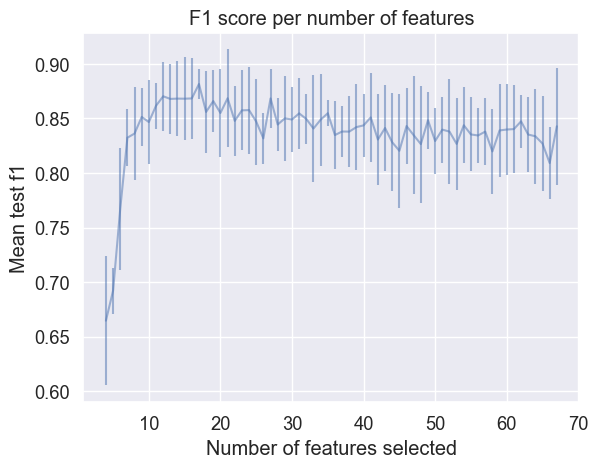

In [46]:
n_scores = len(rfe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1")
plt.errorbar(range(4, n_scores + 4), rfe.cv_results_["mean_test_score"], yerr=rfe.cv_results_["std_test_score"], alpha=0.5)
plt.title("F1 score per number of features")
plt.show()

In [47]:
ranking = rfe.ranking_

In [48]:
# ranking of the features

importance_features = list(zip(all_features, ranking))
importance_features.sort(key = lambda tup: tup[1], reverse=False)
importance_features

[('DESPC', 1),
 ('DESWC', 1),
 ('DESPL', 1),
 ('DESPLd', 1),
 ('DESPLw', 1),
 ('DESSL', 1),
 ('DESSLd', 1),
 ('DESWLlt', 1),
 ('SYNNP', 1),
 ('SYNMEDlem', 1),
 ('READFKGL', 1),
 ('TOKEN_ATTRIBUTE_RATIO_ALHPA', 1),
 ('TOKEN_ATTRIBUTE_RATIO_PUNCT', 1),
 ('WORD_SET_INCIDENCE_C4_COMMON_WORDS', 1),
 ('SYNMEDwrd', 2),
 ('LDTTRa', 3),
 ('SYNMEDpos', 4),
 ('WORD_PROPERTY_WRDFRQa', 5),
 ('WORD_PROPERTY_WRDVERB', 6),
 ('SYNSTRUTa', 7),
 ('TOKEN_ATTRIBUTE_RATIO_DIGIT', 8),
 ('DESWLltd', 9),
 ('WORD_PROPERTY_WRDHYPnv', 10),
 ('WORD_PROPERTY_CONCRETENESS', 11),
 ('WORD_PROPERTY_WRDADJ', 12),
 ('DESWLsy', 13),
 ('WORD_PROPERTY_WRDFRQc', 14),
 ('SYNLE', 15),
 ('LDMTLD', 16),
 ('WORD_SET_INCIDENCE_CNCPos', 17),
 ('WORD_PROPERTY_PREVALENCE', 18),
 ('DESWLsyd', 19),
 ('WORD_PROPERTY_WRDCNCc', 20),
 ('RDFRE', 21),
 ('WORD_PROPERTY_WRDNOUN', 22),
 ('WORD_SET_INCIDENCE_WRDPRP3p', 23),
 ('LDHDD', 24),
 ('WORD_PROPERTY_WRDPOLc', 25),
 ('WORD_PROPERTY_AOA', 26),
 ('WORD_PROPERTY_WRDHYPn', 27),
 ('WORD_SET_INC

In [49]:
import numpy as np

In [50]:
selected_features = list(np.array(list(X.columns))[rfe.get_support()])
selected_features

['DESPC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLlt',
 'SYNNP',
 'SYNMEDlem',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_PUNCT',
 'WORD_SET_INCIDENCE_C4_COMMON_WORDS']

In [51]:
print(len(selected_features))
print(selected_features)

14
['DESPC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL', 'DESSLd', 'DESWLlt', 'SYNNP', 'SYNMEDlem', 'READFKGL', 'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'WORD_SET_INCIDENCE_C4_COMMON_WORDS']


Exporting a dictionary with the list of features

In [52]:
features = {"corr": correlation,
            "rfecv": selected_features,
            "kolmogorov": diff_distribution,
            "all_features": all_features}

In [53]:
import json
with open(r"Feature_sets\features.json", "w") as f:
    json.dump(features, f)